In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!unzip -P Skoltech '/content/drive/My Drive/hack_data.zip'

Archive:  /content/drive/My Drive/hack_data.zip
  inflating: clients.csv             
  inflating: materials.csv           
  inflating: plants.csv              
  inflating: transactions.parquet    


In [11]:
!python -m pip install "dask[complete]" 

     |████████████████████████████████| 92kB 3.0MB/s 
     |████████████████████████████████| 655kB 8.9MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=cdb25a1b3c1a760ae83c8f9d58d12f8c14f020591d1f4a6d366d94d91bf3bf25
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=d7ac5a7df80dfe022e36755eabe11f740744ef6b5c81420766b6c2d92bd1afc7
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built locket contextvars
ERROR: distributed 2.28.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [12]:
import dask.dataframe as dd
import pandas as pd
import pickle
from tqdm import tqdm
import numpy as np

In [13]:
clients = pd.read_csv('clients.csv', verbose=True)
materials = pd.read_csv('materials.csv', verbose=True)
plants = pd.read_csv('plants.csv', verbose=True)

Tokenization took: 40.71 ms
Type conversion took: 62.77 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 79.17 ms
Type conversion took: 86.73 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 31.91 ms
Type conversion took: 48.41 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 0.08 ms
Type conversion took: 0.48 ms
Parser memory cleanup took: 0.00 ms


In [6]:
# from dask.distributed import Client
# client = Client(n_workers=1, threads_per_worker=16, processes=False, memory_limit='20GB')

In [14]:
transactions_dd = dd.read_parquet('transactions.parquet')

In [8]:
# transactions_pd = pd.read_parquet('transactions.parquet', engine='pyarrow')

In [9]:
# len(transactions_dd)

In [15]:
res_sum = transactions_dd.groupby(['plant', 'material', 'chq_date'])['sales_count'].sum().compute()

In [16]:
type(res_sum)

pandas.core.series.Series

In [18]:
res_sum

plant                             material                          chq_date  
00fdea78e677259a3e44868468f24bbf  00011c1252f877221e0e0a3ddf21858e  2017-02-14    1.0
                                                                    2017-03-09    1.0
                                                                    2017-06-19    1.0
                                                                    2017-07-03    1.0
                                  000189cbec3b82946747db131d67805a  2016-10-17    2.0
                                                                                 ... 
ffe49cdf45d56b04b8542e6abc4f5fb6  ffe2eeb75da44282d992e5b179ca363b  2017-01-25    1.0
                                  ffea3233ca27acca847b4a67f3d91daf  2017-07-13    1.0
                                                                    2017-08-22    1.0
                                  ffeab2e9fdfa4750f65b1021bc6e9f92  2017-07-05    1.0
                                                             

In [25]:
res_sum.to_pickle('/content/drive/My Drive/series_groupby_pl_mat_date_for_sales.pkl')

In [19]:
transactions_dd['plant'].compute().mode()

0    95b09698fda1f64af16708ffb859eab9
dtype: object

In [20]:
res_sum.index[0]

('00fdea78e677259a3e44868468f24bbf',
 '00011c1252f877221e0e0a3ddf21858e',
 Timestamp('2017-02-14 00:00:00'))

In [21]:
# top_shop = []
# index_shop = 
# for index_tuple in tqdm(res_sum.index):


In [22]:
type(res_sum.index[0])

tuple

In [23]:
series_df = res_sum.to_frame().reset_index()

In [24]:
series_df['plant'].mode()

0    95b09698fda1f64af16708ffb859eab9
dtype: object

In [25]:
series_df['plant'].value_counts()[:10].index.tolist()

['95b09698fda1f64af16708ffb859eab9',
 '29549a71a57f587d88209b9c1f1b7999',
 '43692f46e3168b32434dd507ebc85dbe',
 '6858fb45a3d3aef7c29322d3b68dffd1',
 '6950aac2d7932e1f1a4c3cf6ada1316e',
 'ae2bac2e4b4da805d01b2952d7e35ba4',
 '29150bb2319c182c944841c74d2f8d75',
 '96fd0b319802304d48a45170b917cd27',
 '7f8bb0fe8b33780a08fe6b60ced14529',
 '6bcf53c2bdbee891ffaca1e612b0076c']

In [26]:
top_plant = '95b09698fda1f64af16708ffb859eab9'

In [27]:
res_sum[top_plant].index.unique(level='material')

Index(['000189cbec3b82946747db131d67805a', '000273bf6eb4ba9a2ec52c0b5ee564ed',
       '00059f95a35296c81dbcd8a0e0cdfc25', '00062baa7a86f80134a12d867e9e7a7e',
       '00098890c81a63e8b51f9a7dd7d88366', '000f960748eb032bf44b02a7e53a1310',
       '000fcaa7299fd2dc7a142786cb61be30', '00104b38b0b48f14e6b94c294a91356b',
       '0011c40ebaffeab60ed4ebaa5e8c3719', '0015533ac2ccc1dcba69812ad1f8a327',
       ...
       'fff020fc1009de8b8d5923c249371baf', 'fff0691795b859ab6e76e18527fae535',
       'fff38259e1f5e21ca61286fb7a36ed7d', 'fff3bc37da63e82e2f1fa8ed2f7b3085',
       'fff45ceb3819a66370b7d1538c8bdbc9', 'fff94686991a4349798e1ac5eb686dbd',
       'fffbf4ac90f339e786412f66ea38bf0d', 'fffbf6021e1d37c11d26eb04840ecd9b',
       'fffe0dced2748225d104997dd097e1ee', 'ffff4284e30a31e6698eb35b8fb0fe37'],
      dtype='object', name='material', length=33803)

In [28]:
'fff94686991a4349798e1ac5eb686dbd' in plants['plant']

False

In [29]:
for plant_buf in series_df['plant'].value_counts()[:100].index.tolist():
  if (plants[plants['plant']==plant_buf]['city'] == 'Moscow').values[0]:
    print("Top Moscow plant")
    print(plant_buf)

Top Moscow plant
ca0a908e85ac27b2cd0d2b82b3e374e5
Top Moscow plant
a4bab3ce420ea5342f99b468206738eb
Top Moscow plant
785ee201dc63daae3aecb2c7cbae60d3


In [30]:
plants

,plant,plant_type,city
0,95b09698fda1f64af16708ffb859eab9,HM,St. Petersburg
1,926abae84a4bd33c834bc6b981b8cf30,HM,St. Petersburg
2,ae2bac2e4b4da805d01b2952d7e35ba4,HM,St. Petersburg
3,0e7e3cf0ded4d9db8b376b317c007f99,HM,St. Petersburg
4,540bd55a2cf295b8ea9cd78650e89d03,HM,St. Petersburg
...,...,...,...
383,8178a650c360ce1a3fe81858f0e75760,SM,Other
384,238d77348d954fdd455aabb09575f2d0,SM,Other
385,6e1acaeb838a890e6570284f73e1d00f,SM,Other
386,7fc3ee9aad33036cc501b2ca7c163fc1,SM,Other


In [31]:
for plant_buf in series_df['plant'].value_counts()[:20].index.tolist():
  if (plants[plants['plant']==plant_buf]['city'] == 'St. Petersburg').values[0]:
    print("Top St. Peterburg plant")
    print(plant_buf)

Top St. Peterburg plant
95b09698fda1f64af16708ffb859eab9
Top St. Peterburg plant
29549a71a57f587d88209b9c1f1b7999
Top St. Peterburg plant
6858fb45a3d3aef7c29322d3b68dffd1
Top St. Peterburg plant
6950aac2d7932e1f1a4c3cf6ada1316e
Top St. Peterburg plant
ae2bac2e4b4da805d01b2952d7e35ba4
Top St. Peterburg plant
29150bb2319c182c944841c74d2f8d75
Top St. Peterburg plant
7f8bb0fe8b33780a08fe6b60ced14529
Top St. Peterburg plant
d39934ce111a864abf40391f3da9cdf5
Top St. Peterburg plant
0e7e3cf0ded4d9db8b376b317c007f99
Top St. Peterburg plant
540bd55a2cf295b8ea9cd78650e89d03
Top St. Peterburg plant
a9b2b0ce7799c4de9c7a3aed9ebeddeb
Top St. Peterburg plant
0c82a0ea628e0ec608d70d1db9d822d9
Top St. Peterburg plant
7cd86ecb09aa48c6e620b340f6a74592


In [32]:
series_df['plant'].value_counts()[:20].index.tolist()

['95b09698fda1f64af16708ffb859eab9',
 '29549a71a57f587d88209b9c1f1b7999',
 '43692f46e3168b32434dd507ebc85dbe',
 '6858fb45a3d3aef7c29322d3b68dffd1',
 '6950aac2d7932e1f1a4c3cf6ada1316e',
 'ae2bac2e4b4da805d01b2952d7e35ba4',
 '29150bb2319c182c944841c74d2f8d75',
 '96fd0b319802304d48a45170b917cd27',
 '7f8bb0fe8b33780a08fe6b60ced14529',
 '6bcf53c2bdbee891ffaca1e612b0076c',
 'd39934ce111a864abf40391f3da9cdf5',
 '2ebe25dd3a566f36f80d55440d3c3834',
 '0e7e3cf0ded4d9db8b376b317c007f99',
 'c3b86052d1fc94bd11c279a17f3f25e1',
 '540bd55a2cf295b8ea9cd78650e89d03',
 'a9b2b0ce7799c4de9c7a3aed9ebeddeb',
 '0c82a0ea628e0ec608d70d1db9d822d9',
 'a410115ed452a9213424d92cacd2a083',
 '7cd86ecb09aa48c6e620b340f6a74592',
 '533e708938a41768fa8e38b3be11a82a']

In [33]:
for plant_buf in series_df['plant'].value_counts()[:10].index.tolist():
  if (plants[plants['plant']==plant_buf]['city'] == 'Other').values[0]:
    print("Top Other")
    print(plant_buf)

Top Other
43692f46e3168b32434dd507ebc85dbe
Top Other
96fd0b319802304d48a45170b917cd27
Top Other
6bcf53c2bdbee891ffaca1e612b0076c


In [34]:
(plants[plants['plant']==plant_buf]['city'] == 'Moscow').values[0]

False

In [36]:
# material_count_score.sort_values(ascending=False)

In [39]:
# for item_buf in material_count_score.sort_values(ascending=False):
#   print(item_buf)
#   break

In [40]:
top_moscow_plant = 'ca0a908e85ac27b2cd0d2b82b3e374e5'
top_peter_plant = '95b09698fda1f64af16708ffb859eab9'
top_other_plant = '43692f46e3168b32434dd507ebc85dbe'
peter_13_plant = '7cd86ecb09aa48c6e620b340f6a74592'
peter_5_plant = 'ae2bac2e4b4da805d01b2952d7e35ba4'

In [41]:
mat_index_count = np.zeros(res_sum[top_plant].index.unique(level='material').shape[0])

In [42]:
res_sum[top_plant]['000273bf6eb4ba9a2ec52c0b5ee564ed'].shape[0]

65

In [43]:
material_count_score = res_sum[top_plant].reset_index().groupby('material')['chq_date'].nunique()

In [44]:
material_count_score.sort_values(ascending=False)

material
b75147feae4cf8ec07fb5f2cef855def    366
6278f48a43fb0a23036b3a11c92e726c    364
6c5fc0444aefd3430c9866c45b6e1032    359
49634c5bef39b4402e0ca16eed2a0292    343
5a008f40c57611feda53dbd9935e7189    342
                                   ... 
d4b3b622eb651bdbbc8183df3b704e3b      1
acf957ba6c3aba8c26b1936ede38555b      1
d4b4ccad68e7dcbcee781409ddedbf67      1
acf6fe27ada3cd4d5ccf0d9fee4812d6      1
c9f8dc2cbe0d5f0ce0b123a8c4d59d40      1
Name: chq_date, Length: 33803, dtype: int64

In [45]:
def item_market_filter()

SyntaxError: ignored

In [93]:
regular_items = []

for material_buf in material_count_score.sort_values(ascending=False).index:
  # print(material_buf)
  items_daily_purchase = res_sum[top_peter_plant][material_buf].sort_values()
  buf_median = np.median(np.append(items_daily_purchase, np.zeros(366 - items_daily_purchase.shape[0])))
  if buf_median > 1.0:
    print(material_buf)
    regular_items.append(material_buf)

b75147feae4cf8ec07fb5f2cef855def
6278f48a43fb0a23036b3a11c92e726c
6c5fc0444aefd3430c9866c45b6e1032
49634c5bef39b4402e0ca16eed2a0292
5a008f40c57611feda53dbd9935e7189
76608b1b1d38384fcac3e2b14e6ec0c9
763e061fd79190b901082035761a4a83
528155b35467ad2ace33307270ebd0bb
142d63107737a448dc2dfe2dcd0154b8
1accaece89aad30aeab8ee5a72a2ecf0
6eaa9bd12a43a4d79badd51a62ac3d76
9997280c0ccb5ad7d1e9955cf8f495f8
232cfe8b28970434f685b737737b26d4
274b6f8364f2f8c6c8161905df944aee
767aaeb00eb1c7dd273ba954b3e2f4b8
a9e11060ef4cb84b377898ecd0f17fd4
1834cca0667f125cf43716399fba98cf
85a402698a75cee09c14e747bfd34758
cad2b7286d60ec58918d088503b518df
c100ca8c79220a5276527b3778146d1f
38d03894b5c7c8cc52f70182f5cb15cb
441f83db20dab8cbdd080b53307836e2
33306ccd877e73c388652739869d3dc7
1cbaaeb2212bbbe9d458ca9b81d74db7
069d4db01f8dc53f2f18afb82073729b
0630c162a89ae0a9e4aa379a574a3158
5e3039a269ff005f2c76cea16c0cf783
446b8945dacf556fc32e1382df86c03c
77bbdd705ed06bfc4158e0a858df74b3
dae7d75b88843c9206161413df59e45b
ef7bf41211

KeyboardInterrupt: ignored

In [94]:
len(regular_items)

40

In [49]:
items_daily_purchase = res_sum[top_peter_plant]['903974d8ccbf37e796b3e049882a68a8'].sort_values()
np.median(np.append(items_daily_purchase, np.zeros(366 - items_daily_purchase.shape[0]))) > 5

False

In [50]:
items_daily_purchase

chq_date
2017-09-29    0.102
2017-09-10    0.108
2017-05-04    0.126
2016-12-09    0.137
2016-10-18    0.149
              ...  
2017-02-25    0.832
2016-11-14    0.874
2017-09-06    0.878
2017-05-30    1.056
2017-01-28    1.344
Name: sales_count, Length: 92, dtype: float64

In [51]:
numpy.median(np.append(res_sum[top_peter_plant][selected_item].values, np.zeros(10)))

NameError: ignored

In [52]:
material_count_score.sort_values().index

Index(['c9f8dc2cbe0d5f0ce0b123a8c4d59d40', 'acf6fe27ada3cd4d5ccf0d9fee4812d6',
       'd4b4ccad68e7dcbcee781409ddedbf67', 'acf957ba6c3aba8c26b1936ede38555b',
       'd4b3b622eb651bdbbc8183df3b704e3b', 'd4ad334e64d7d66c47a4ce37556f36ea',
       '3a34fafd8ad52b2e3c1b6951efb102af', '3a397e2fba951b16ab3faf0a41947ba5',
       'acecee2c1b0fca982755408254aac707', 'acfcaf8d8d8a9d5dc447e79bfe5ea064',
       ...
       'eb23a7cc9c97e7cb82c9e69fdaaefe46', '142d63107737a448dc2dfe2dcd0154b8',
       '528155b35467ad2ace33307270ebd0bb', '763e061fd79190b901082035761a4a83',
       '76608b1b1d38384fcac3e2b14e6ec0c9', '5a008f40c57611feda53dbd9935e7189',
       '49634c5bef39b4402e0ca16eed2a0292', '6c5fc0444aefd3430c9866c45b6e1032',
       '6278f48a43fb0a23036b3a11c92e726c', 'b75147feae4cf8ec07fb5f2cef855def'],
      dtype='object', name='material', length=33803)

In [53]:
material_count_score.argmax()

24175

In [54]:
res_sum[top_plant]['6278f48a43fb0a23036b3a11c92e726c'].corr(res_sum[top_plant]['b75147feae4cf8ec07fb5f2cef855def'])

0.22403829093333694

In [185]:
import matplotlib.pyplot as plt


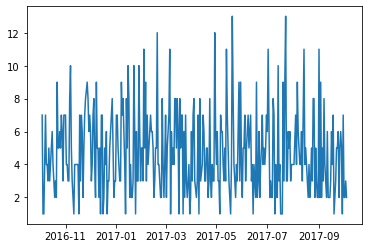

In [186]:
plt.plot(res_sum[top_plant][material_count_score.sort_values().index[-3]])

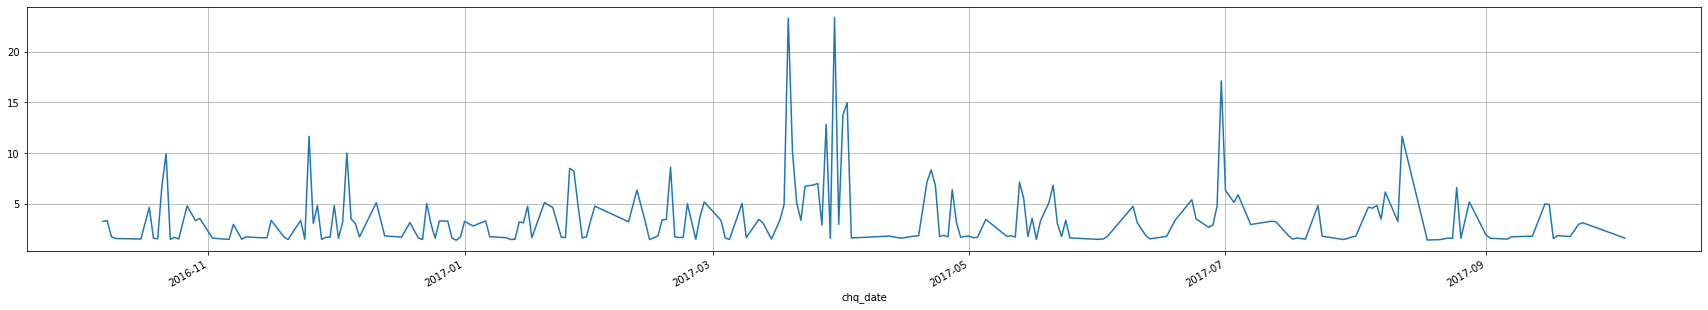

In [206]:
# top_plant_top_material = material_count_score.sort_values()[-2]
# top_plant_top_material = res_sum[top_plant].index.unique(level='material')[material_count_score.argmax()]
ax = res_sum[top_plant][material_count_score.sort_values().index[-70]].plot(figsize=(30,5))
# ax.plot(res_sum[top_plant][material_count_score.sort_values().index[-2]])

ax.grid()

In [203]:
res_sum[top_plant][material_count_score.sort_values().index[0]].min()

1.0

In [59]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [412]:
list_from_nikita = ['69b39be8b182386f310fd3a7689a4cad',
 '00dd66971e21a68bb052882103bec2a1',
 '4581032958f644251cb9f3953cfc0ee8',
 '67680ea3a4a2529e448682893d5a706c',
 '0de2d4c7997862a3cb3fa23409a0171e',
 'e0b63ca70000cc0bd8adf2bb98e7a14c',
 '72c09055cea98928974ca175c5a81ae1',
 '6964e7ca85a4815c0c9dd8255c7bcff4',
 'd99ff1bb6ab63242de3b682b51461dce',
 'c6571b7b1b7ce43041791bd91a5a65dd']
for item_buf in list_from_nikita:
  if item_buf in material_count_score.sort_values().index:
    print(item_buf)
print('finished')

69b39be8b182386f310fd3a7689a4cad
4581032958f644251cb9f3953cfc0ee8
67680ea3a4a2529e448682893d5a706c
0de2d4c7997862a3cb3fa23409a0171e
6964e7ca85a4815c0c9dd8255c7bcff4
c6571b7b1b7ce43041791bd91a5a65dd
finished


In [399]:
res_sum[top_peter_plant]

material                          chq_date  
000189cbec3b82946747db131d67805a  2016-12-09    2.000
                                  2016-12-16    2.000
                                  2017-01-26    1.000
                                  2017-04-19    1.000
000273bf6eb4ba9a2ec52c0b5ee564ed  2016-10-15    1.444
                                                ...  
ffff4284e30a31e6698eb35b8fb0fe37  2017-03-09    1.000
                                  2017-04-04    1.000
                                  2017-04-30    1.000
                                  2017-06-06    1.000
                                  2017-07-01    1.000
Name: sales_count, Length: 329656, dtype: float64

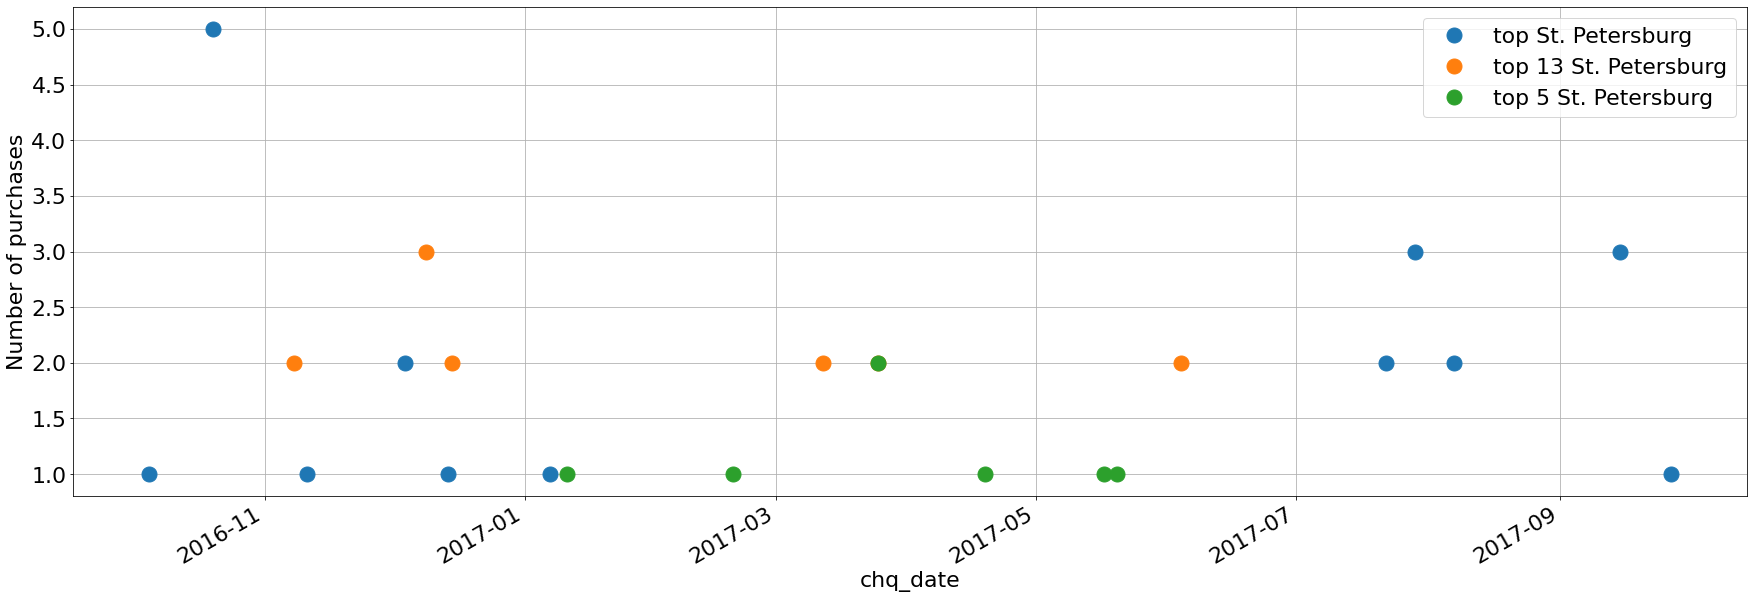

In [60]:
selected_item = '69b39be8b182386f310fd3a7689a4cad'
# selected_item = 'c6571b7b1b7ce43041791bd91a5a65dd'

ax = res_sum[top_peter_plant][selected_item].plot(figsize=(30,10), marker='o', linestyle='None', markersize=15, label='top St. Petersburg')
ax.plot(res_sum[peter_13_plant][selected_item], marker='o', linestyle='None', markersize=15, label='top 13 St. Petersburg')
ax.plot(res_sum[peter_5_plant][selected_item], marker='o', linestyle='None', markersize=15, label='top 5 St. Petersburg')

# ax.set_ylim(0,10)
ax.grid()
ax.set_ylabel('Number of purchases')
ax.legend()


In [61]:
with open('/content/drive/My Drive/clients_top_five_goods.pkl', 'rb') as handle:
    top_5_customers_goods = pickle.load(handle)

In [79]:
from collections import deque
favorite_materials = deque()
for customer_id in list(top_5_customers_goods.keys()):
  favorite_materials.extend(top_5_customers_goods[customer_id]['materials'].tolist())

In [85]:
unique_favorite_items = set(favorite_materials)

In [86]:
len(unique_favorite_items)

69948

In [92]:
len(set(material_count_score.sort_values().index.values.tolist()))

33803

In [87]:
res_sum[top_peter_plant]['material']

material                          chq_date  
000189cbec3b82946747db131d67805a  2016-12-09    2.000
                                  2016-12-16    2.000
                                  2017-01-26    1.000
                                  2017-04-19    1.000
000273bf6eb4ba9a2ec52c0b5ee564ed  2016-10-15    1.444
                                                ...  
ffff4284e30a31e6698eb35b8fb0fe37  2017-03-09    1.000
                                  2017-04-04    1.000
                                  2017-04-30    1.000
                                  2017-06-06    1.000
                                  2017-07-01    1.000
Name: sales_count, Length: 329656, dtype: float64

In [62]:
top_5_customers_goods

{'90fca68123e692a005a4edeadd94b2f2': {'materials': array(['0b4640bfe749feb7149a4178e51bd0d0',
         '335f4ba13bc5ba6ac527317c634027c0',
         '31c845b6a5a9e285f5e6e21a468f33d0',
         'e09bae8a6aa3492347bef47d9913344a',
         'bd6720896b9639c3978073797653500e'], dtype='<U32'),
  'scores': array([ 599.08928571,  762.47727273,  798.78571429,  915.33451957,
         1677.45      ])},
 '26f3232ab25e58588cd2b4002b6f7836': {'materials': array(['5a62f93247abf23321d6f6d00cc03782',
         '96e11f80b67e1db8febf6ea0a90ddf00',
         '6cd60c246e9895337550c3f9d5fb1c5c',
         'f6376c6e7d2da367e7a7243c46547956',
         '237ddb493d39894c26f734f184b714e4'], dtype='<U32'),
  'scores': array([1219.96363636, 1266.        , 1397.875     , 1524.95454545,
         1797.26785714])},
 '4d68fdddb5deaa496ce485bd51929ab1': {'materials': array(['aed8c2908d575787e722d08052345aec',
         '90cfbbf20e677d036baf42b3655d5a6d',
         '555219814aa0a3b97194e9df70cb9ece',
         'b3d3a599b55287

In [297]:
selected_item = material_count_score.sort_values().index[-27]
# selected_item = 'd6adc9e7704e7060824cb7da075bf566'

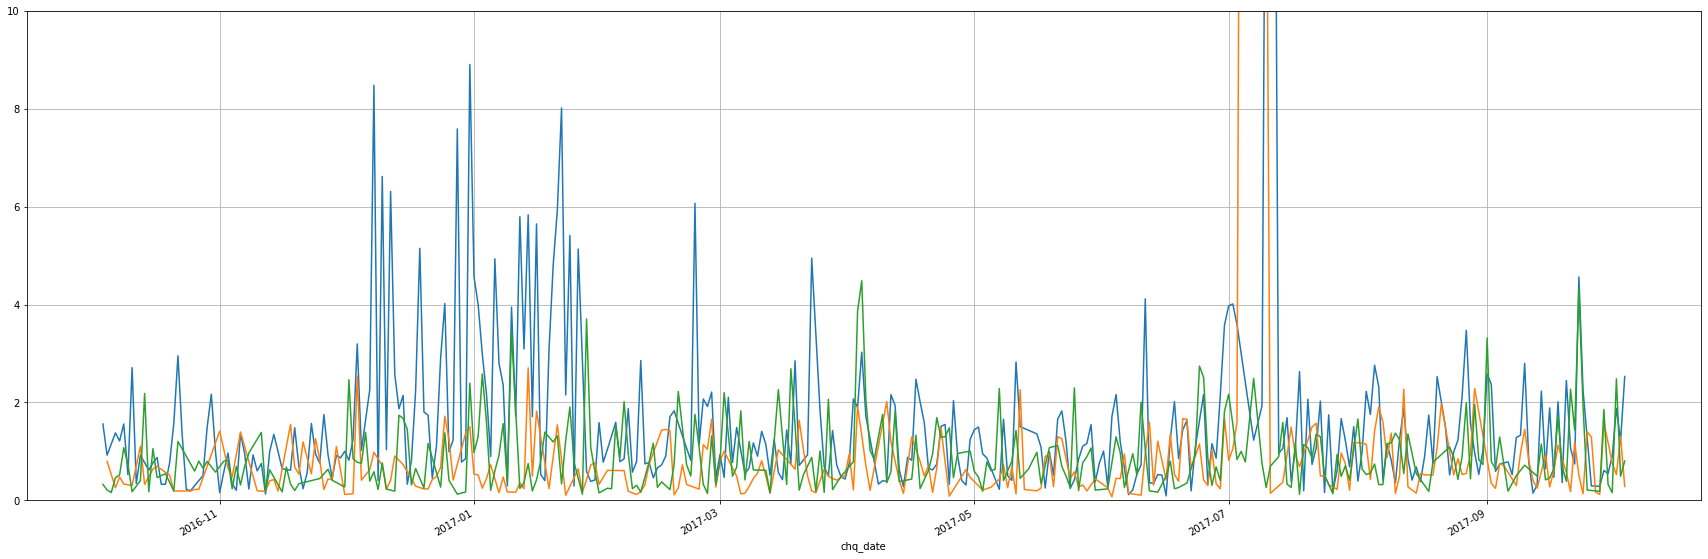

In [324]:
selected_item = material_count_score.sort_values().index[-10]
ax = res_sum[top_peter_plant][selected_item].plot(figsize=(30,10), marker='None', linestyle='-')
ax.plot(res_sum[peter_13_plant][selected_item], marker='None', linestyle='-')
ax.plot(res_sum[peter_5_plant][selected_item], marker='None', linestyle='-')

ax.set_ylim(0,10)
ax.grid()

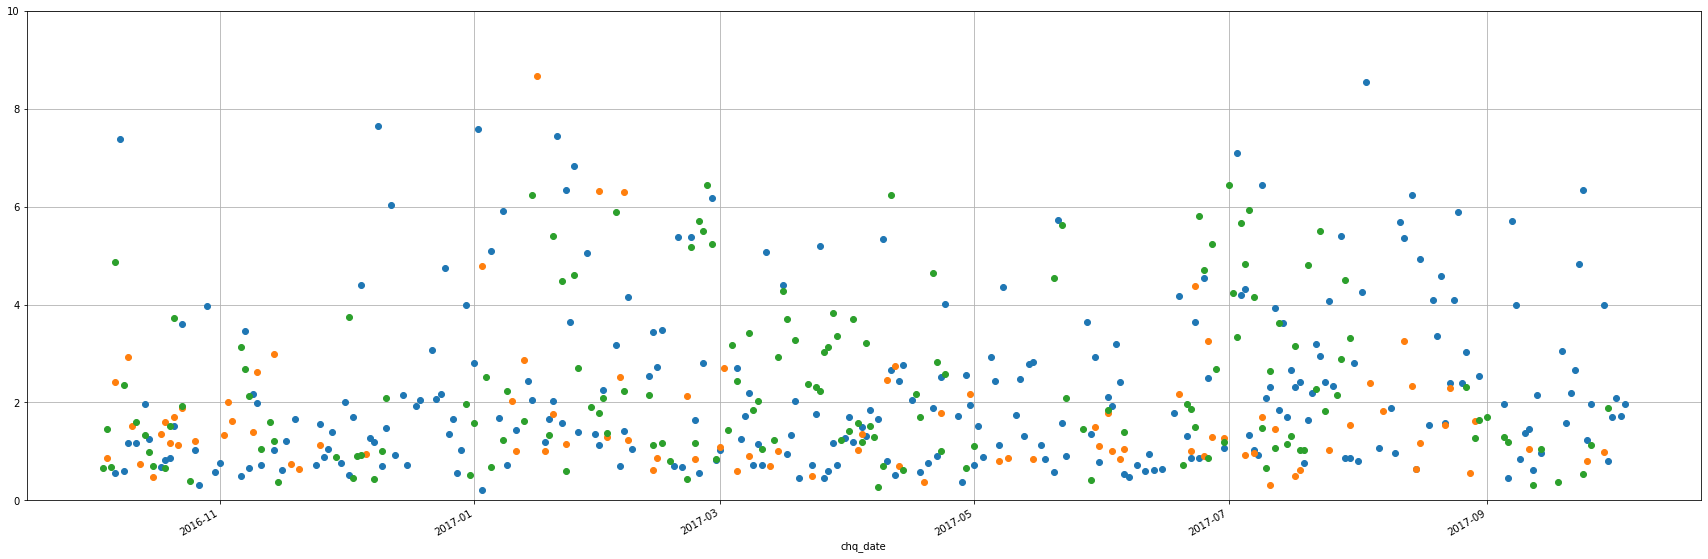

In [300]:
selected_item = material_count_score.sort_values().index[-35]
ax = res_sum[top_peter_plant][selected_item].plot(figsize=(30,10), marker='o', linestyle='None')
ax.plot(res_sum[top_moscow_plant][selected_item], marker='o', linestyle='None')
ax.plot(res_sum[top_other_plant][selected_item], marker='o', linestyle='None')

ax.set_ylim(0,10)
ax.grid()

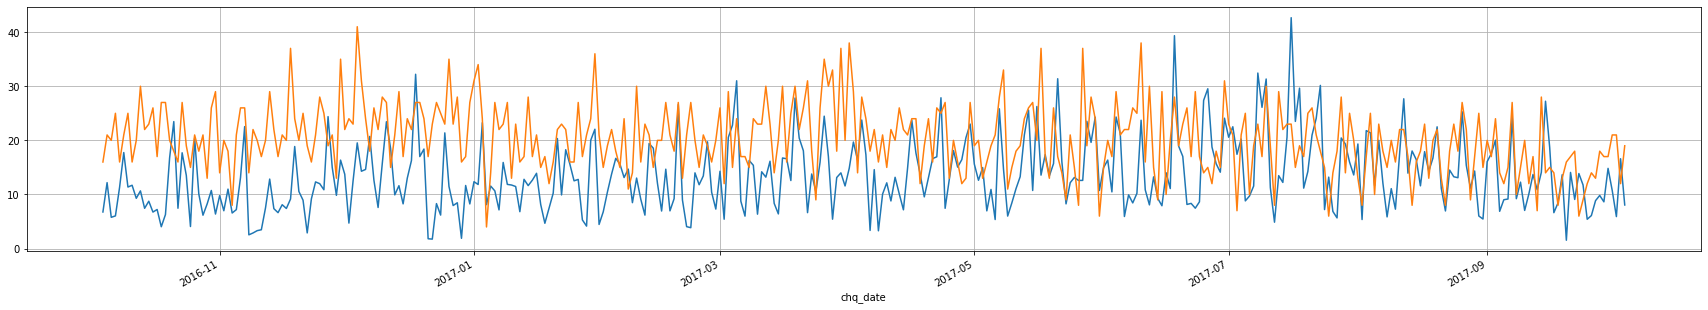

In [189]:
# top_plant_top_material = material_count_score.sort_values()[-2]
# top_plant_top_material = res_sum[top_plant].index.unique(level='material')[material_count_score.argmax()]
ax = res_sum[top_plant][material_count_score.sort_values().index[-2]].plot(figsize=(30,5))
# ax.plot(res_sum[top_plant][material_count_score.sort_values().index[-2]])
ax.plot(res_sum[top_plant][material_count_score.sort_values().index[-1]])

ax.grid()

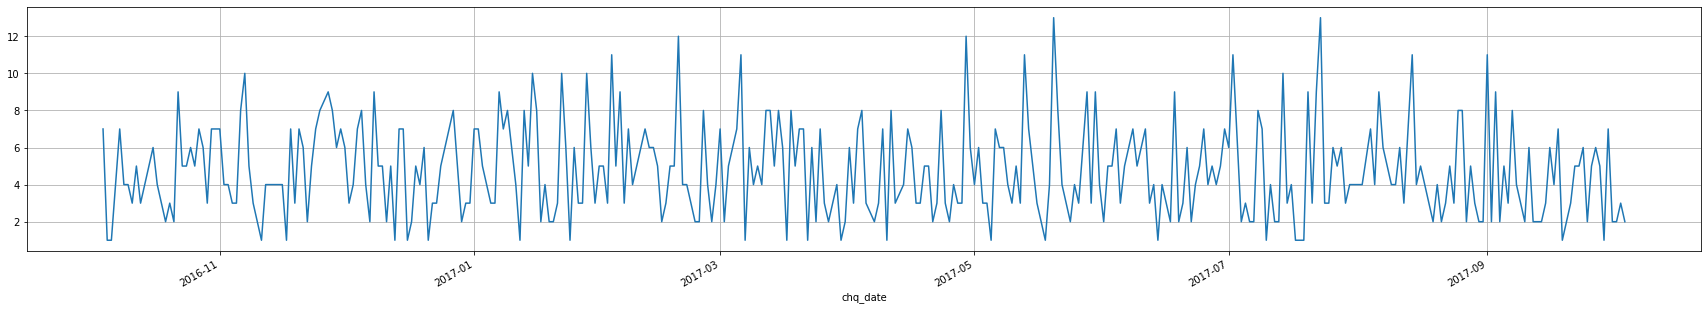

In [167]:
# top_plant_top_material = material_count_score.sort_values()[-2]
# top_plant_top_material = res_sum[top_plant].index.unique(level='material')[material_count_score.argmax()]
ax = res_sum[top_plant][material_count_score.sort_values().index[-3]].plot(figsize=(30,5))
ax.
ax.grid()

In [181]:
res_sum[top_plant][material_count_score.sort_values().index[-1]].sum()

7454.0

In [162]:
res_sum[top_plant][material_count_score.sort_values().index[-30]].min()

1.0

In [92]:
np.where(mat_index_count==mat_index_count.max())

str

In [58]:
series_df.columns

Index(['sales_count'], dtype='object')

In [62]:
series_df.index[0]

('00fdea78e677259a3e44868468f24bbf',
 '00011c1252f877221e0e0a3ddf21858e',
 Timestamp('2017-02-14 00:00:00'))

In [60]:
type(series_df.index[0])

tuple

In [ ]:
plant_history = {}
plant_grouped_trans = transactions_dd.groupby('plant')
for plant_id in transactions_dd['plant'].unique():

    plant_history[plant_id] = {}
    trans_by_material = plant_grouped_trans.get_group(plant_id).groupby('material')
    
    for material_id in tqdm(plant_grouped_trans.get_group(plant_id)['material'].unique()):
        plant_history[plant_id][material_id] = trans_by_material.get_group(material_id).compute().groupby("chq_date")["sales_count"].sum()
        
    break

  0%|          | 0/27459 [00:00<?, ?it/s]Exception ignored in: <object repr() failed>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tqdm/std.py", line 1062, in __del__
    self.close()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/std.py", line 1237, in close
    if self.disable:
AttributeError: 'tqdm' object has no attribute 'disable'
  0%|          | 17/27459 [17:03<430:30:29, 56.48s/it]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-c61cbb0388ce>", line 9, in <module>
    plant_history[plant_id][material_id] = trans_by_material.get_group(material_id).compute().groupby("chq_date")["sales_count"].sum()
  File "/usr/local/lib/python3.6/dist-packages/dask/base.py", line 166, in compute
    (result,) = compute(self, traverse=False, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/dask/base.py", line 437, in compute
    results = schedule(dsk, keys, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/dask/threaded.py", line 84, in get
    **kwargs
  File "/usr/local/lib/python3.6/dist-packages/dask/local.py", line 475, in get_async
    key, res_info, failed = queue_get(queue)
  File "/usr/local/lib/python3.6/dist-packages/dask/local.py", line 133, in queue_get
    return q.get()
  File "/usr

KeyboardInterrupt: ignored

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 444, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 421, in execute_request
    self._abort_queues()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 636, in _abort_queues
    self._abort_queue(stream)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 661, in _abort_queue
    pol

In [ ]:
material_id

In [ ]:
plant_history[plant_id][material_id]

In [26]:
trans_by_material.get_group(material_id).compute().groupby("chq_date")["sales_count"].sum()

chq_date
2016-10-31    1.0
Name: sales_count, dtype: float64

In [28]:
plant_id

'7cd86ecb09aa48c6e620b340f6a74592'

In [27]:
plant_transactions[plant_id][material_id]

KeyError: ignored

In [17]:
plant_history = {}


for id_plant, plant in tqdm(plants.iterrows()):
    
    plant_transactions = transactions_dd[transactions_dd['plant']==plant['plant']]
    
    material_history = {}
    for material in plant_transactions['material'].unique():
        material_history[material] = plant_transactions[plant_transactions['material'] == material].groupby("chq_date")["sales_count"].sum().compute()
    
    plant_history['plant'] = material_history


0it [00:00, ?it/s]distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 17.32 GB -- Worker memory limit: 20.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 17.54 GB -- Worker memory limit: 20.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 17.77 GB -- Worker memory limit: 20.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 18.00 GB -- Worker memory limit: 20.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 18.23 GB -- Worker memory limit: 20.00

KeyboardInterrupt: ignored

distributed.worker - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 15.66 GB -- Worker memory limit: 20.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 15.66 GB -- Worker memory limit: 20.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 15.67 GB -- Worker memory limit: 20.00 GB


In [24]:
target = os.path.join('/content/drive/My Drive', 'accounts.h5')

In [25]:
target

'/content/drive/My Drive/accounts.h5'

In [26]:
trans.to_hdf(target, '*')

/usr/local/lib/python3.6/dist-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


['/content/drive/My Drive/accounts.h5']

In [ ]:
trans.shape

In [ ]:
trans2 = pd.read_csv('/content/drive/My Drive/sample.csv')

In [ ]:
trans2.head()

,Unnamed: 0,chq_id,plant,chq_date,chq_position,client_id,material,sales_count,sales_sum,is_promo
0,26124569,01fb5fa1a778790afd08e8d7ef38e237,cccc8bc3d6630bf84a08f9ba361baea0,2017-08-03,25,6da30a50f81238d9b3e426c6b885d2ec,44ce960aed7d4c21001db08667a95bb0,2.00,23.58,0
1,25465983,867db9be630079c386bf8a5623482c9f,65b6f89e9041a2a78554f1c3db6c13e9,2017-07-22,44,2494649ed77f876d8bb818e41e65a705,184790d7f3250d7da915e71cf32ad255,1.00,149.99,0
2,14300781,27dbe224d498e0675aaaf0f0e198926a,2c393e45170ca8e02cc1b670e799da1b,2017-04-20,35,6934eef0d62f7e451fe803543c0d58a7,92c77ef0ad96da2bcf81e5f8d854e40b,4.00,159.56,1
3,22749195,4f90e9a0ab96ac01804a29e717ddadc8,9423f9da33f4c25382bf9dd96812916d,2017-06-19,9,f7d99bf6d08b1d733c4a38caa7283ef7,c2f210cc3ba0ea02c319eedd17d70a69,1.59,111.28,0
4,24955029,6bbdab43883e74f727ace712ee586017,66e78b22162c1774129ea149e0171b52,2016-10-09,4,a61459a5239c680fdbabe968df231ef4,ded0f55a75324cefcc53249559331e18,1.00,69.99,1


In [ ]:
trans2_grouped = trans2.groupby('client_id')

In [ ]:
clients_dict = {}

for trans_by_client_id in tqdm(trans2_grouped):
  client_id = trans_by_client_id[0]
  clients_dict[client_id] = {}
  trans_by_client_chq = trans_by_client_id[1].groupby('chq_id')
  
  for client_chq in trans_by_client_chq:
    clients_dict[client_id][client_chq[0]] = {}
    for column in ['plant', 'chq_date', 'material', 'sales_count', 'sales_sum', 'is_promo']:
      clients_dict[client_id][client_chq[0]][column] = client_chq[1].iloc[0][column]


  1%|▏         | 1299/91423 [00:22<21:30, 69.84it/s]

KeyboardInterrupt: ignored

In [ ]:
print(clients_dict.keys())

dict_keys(['0000d48a8891cd462fdf01ea861ec53e', '00028a1dcb30863404a386961a69300e', '0004274683494a9eca5e70ef97299d55', '00072f81efcb3481861f7300c5e2a88a', '00076596eb749cf10c2e984621dffe95', '00076dd9aa78642b7254fef37a1cdb3e', '0008322584b6781d656d7299e80c47f8', '00084b0b8d2649ed19e7a4df5062349b', '0008755f60606b6f8f8ea75ab98a9570', '0008cb44b4f40b04132d6dad44ea0d2c', '0008d7ebeb88886c8da5df07ac2d075f', '0009dae8ad7e1989054a19df18375134', '000a16b7265576e37c076f1423fa45fb', '000ac33e8990a55ba1ddd33b6300e4d3', '000b3314b6b5b91bc91a13ee9a87da25', '000bd6b9beffa9a3fca11224fe36cf2d', '000dab8b2c08ebd7f60d3782d9a4a500', '000df145bc1b56b3c028932d6173e9e6', '000e77c27e3910bdb783165635a05fdd', '000eb74fd036f9bd8b87a1d94e8b9e1b', '000f4f8196b582e33bd0aa594b59fb53', '000ff71a020b2e94076c4883341fc3dd', '001129b9d9e02f30510f6596033d2b99', '0012e4f89351ccba136aa25bfa7a9b18', '00135062b7f1c95750a3da3b5f788283', '0013ea6bf0c02f52cc4de45b8431f47e', '0013f409ab5a0a37aa999e6dc335710e', '001446e6bb2cc2e5

In [ ]:
print(0000d48a8891cd462fdf01ea861ec53e.keys())

dict_keys(['0000d48a8891cd462fdf01ea861ec53e', '00028a1dcb30863404a386961a69300e', '0004274683494a9eca5e70ef97299d55', '00072f81efcb3481861f7300c5e2a88a', '00076596eb749cf10c2e984621dffe95', '00076dd9aa78642b7254fef37a1cdb3e', '0008322584b6781d656d7299e80c47f8', '00084b0b8d2649ed19e7a4df5062349b', '0008755f60606b6f8f8ea75ab98a9570', '0008cb44b4f40b04132d6dad44ea0d2c', '0008d7ebeb88886c8da5df07ac2d075f', '0009dae8ad7e1989054a19df18375134', '000a16b7265576e37c076f1423fa45fb', '000ac33e8990a55ba1ddd33b6300e4d3', '000b3314b6b5b91bc91a13ee9a87da25', '000bd6b9beffa9a3fca11224fe36cf2d', '000dab8b2c08ebd7f60d3782d9a4a500', '000df145bc1b56b3c028932d6173e9e6', '000e77c27e3910bdb783165635a05fdd', '000eb74fd036f9bd8b87a1d94e8b9e1b', '000f4f8196b582e33bd0aa594b59fb53', '000ff71a020b2e94076c4883341fc3dd', '001129b9d9e02f30510f6596033d2b99', '0012e4f89351ccba136aa25bfa7a9b18', '00135062b7f1c95750a3da3b5f788283', '0013ea6bf0c02f52cc4de45b8431f47e', '0013f409ab5a0a37aa999e6dc335710e', '001446e6bb2cc2e5

In [ ]:
clients_dict['0000d48a8891cd462fdf01ea861ec53e']

{'272d955e9fa15e17c0f9089bdf6283cd': {'chq_date': '2017-08-31',
  'is_promo': 0,
  'material': 'c5b4dfc37695199f02ec0218175e9c23',
  'plant': '6858fb45a3d3aef7c29322d3b68dffd1',
  'sales_count': 2.0,
  'sales_sum': 27.98},
 '2977068f5533ac900f577fc571e9464b': {'chq_date': '2017-06-21',
  'is_promo': 0,
  'material': 'da163f4dfbea1578d9b64616e35bf66d',
  'plant': '7f8bb0fe8b33780a08fe6b60ced14529',
  'sales_count': 1.0,
  'sales_sum': 76.09},
 '2a4f1975d20e88b7a49a121a89d2a109': {'chq_date': '2016-12-13',
  'is_promo': 1,
  'material': '24122642f6b2b34296825cff981cf959',
  'plant': '6858fb45a3d3aef7c29322d3b68dffd1',
  'sales_count': 1.0,
  'sales_sum': 49.99},
 '36fc5b66638cd6882db5484148855aad': {'chq_date': '2017-08-11',
  'is_promo': 0,
  'material': '1907a86ec2794b04a0edfd1875e5ed0c',
  'plant': '6858fb45a3d3aef7c29322d3b68dffd1',
  'sales_count': 1.0,
  'sales_sum': 134.99},
 '436c322f5ec688c68c87b47aebee8d9c': {'chq_date': '2017-07-20',
  'is_promo': 1,
  'material': 'cc03c49ceb8

In [ ]:
with open('trans.pickle', 'wb') as handle:
    pickle.dump(clients_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('trans.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
b.keys()

dict_keys(['0000d48a8891cd462fdf01ea861ec53e', '00028a1dcb30863404a386961a69300e', '0004274683494a9eca5e70ef97299d55', '00072f81efcb3481861f7300c5e2a88a', '00076596eb749cf10c2e984621dffe95', '00076dd9aa78642b7254fef37a1cdb3e', '0008322584b6781d656d7299e80c47f8', '00084b0b8d2649ed19e7a4df5062349b', '0008755f60606b6f8f8ea75ab98a9570', '0008cb44b4f40b04132d6dad44ea0d2c', '0008d7ebeb88886c8da5df07ac2d075f', '0009dae8ad7e1989054a19df18375134', '000a16b7265576e37c076f1423fa45fb', '000ac33e8990a55ba1ddd33b6300e4d3', '000b3314b6b5b91bc91a13ee9a87da25', '000bd6b9beffa9a3fca11224fe36cf2d', '000dab8b2c08ebd7f60d3782d9a4a500', '000df145bc1b56b3c028932d6173e9e6', '000e77c27e3910bdb783165635a05fdd', '000eb74fd036f9bd8b87a1d94e8b9e1b', '000f4f8196b582e33bd0aa594b59fb53', '000ff71a020b2e94076c4883341fc3dd', '001129b9d9e02f30510f6596033d2b99', '0012e4f89351ccba136aa25bfa7a9b18', '00135062b7f1c95750a3da3b5f788283', '0013ea6bf0c02f52cc4de45b8431f47e', '0013f409ab5a0a37aa999e6dc335710e', '001446e6bb2cc2e5

In [ ]:
b['0000d48a8891cd462fdf01ea861ec53e']

{'272d955e9fa15e17c0f9089bdf6283cd': {'plant': '6858fb45a3d3aef7c29322d3b68dffd1'},
 '2977068f5533ac900f577fc571e9464b': {'plant': '7f8bb0fe8b33780a08fe6b60ced14529'},
 '2a4f1975d20e88b7a49a121a89d2a109': {'plant': '6858fb45a3d3aef7c29322d3b68dffd1'},
 '36fc5b66638cd6882db5484148855aad': {'plant': '6858fb45a3d3aef7c29322d3b68dffd1'},
 '436c322f5ec688c68c87b47aebee8d9c': {'plant': '6858fb45a3d3aef7c29322d3b68dffd1'},
 '50b662f8dc3d49588b12a9a3c529cf74': {'plant': '7f8bb0fe8b33780a08fe6b60ced14529'},
 '5cad89bca4f84f15a0964bb801772c35': {'plant': '7f8bb0fe8b33780a08fe6b60ced14529'},
 '5e58f7ad4e48291073ee4807d952dd62': {'plant': '6858fb45a3d3aef7c29322d3b68dffd1'},
 '5f3dffc33e579cfce95c989e7a2853d3': {'plant': '6858fb45a3d3aef7c29322d3b68dffd1'},
 '7fe8aeee4114a557a42c604c23132dd0': {'plant': '6858fb45a3d3aef7c29322d3b68dffd1'},
 '8d9b38d9a8fb90def7fbf8cca2d8d83b': {'plant': '7f8bb0fe8b33780a08fe6b60ced14529'},
 '905d1530fb707387e46ca3e03f81f3c9': {'plant': '6858fb45a3d3aef7c29322d3b68d